In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from scipy import spatial

In [226]:

embs_df= pd.read_csv('embeddings300_df_09kmeans.csv', index_col=0)

In [196]:
embs_df=embs_df[~embs_df.index.isna()]

In [197]:
words = np.sort(embs_df.index.values)

In [95]:
embs_df[embs_df.index=='dbscan']
print(np.where(embs_df.index=='dbscan')[0])

[399998]


kmeans
dbscan


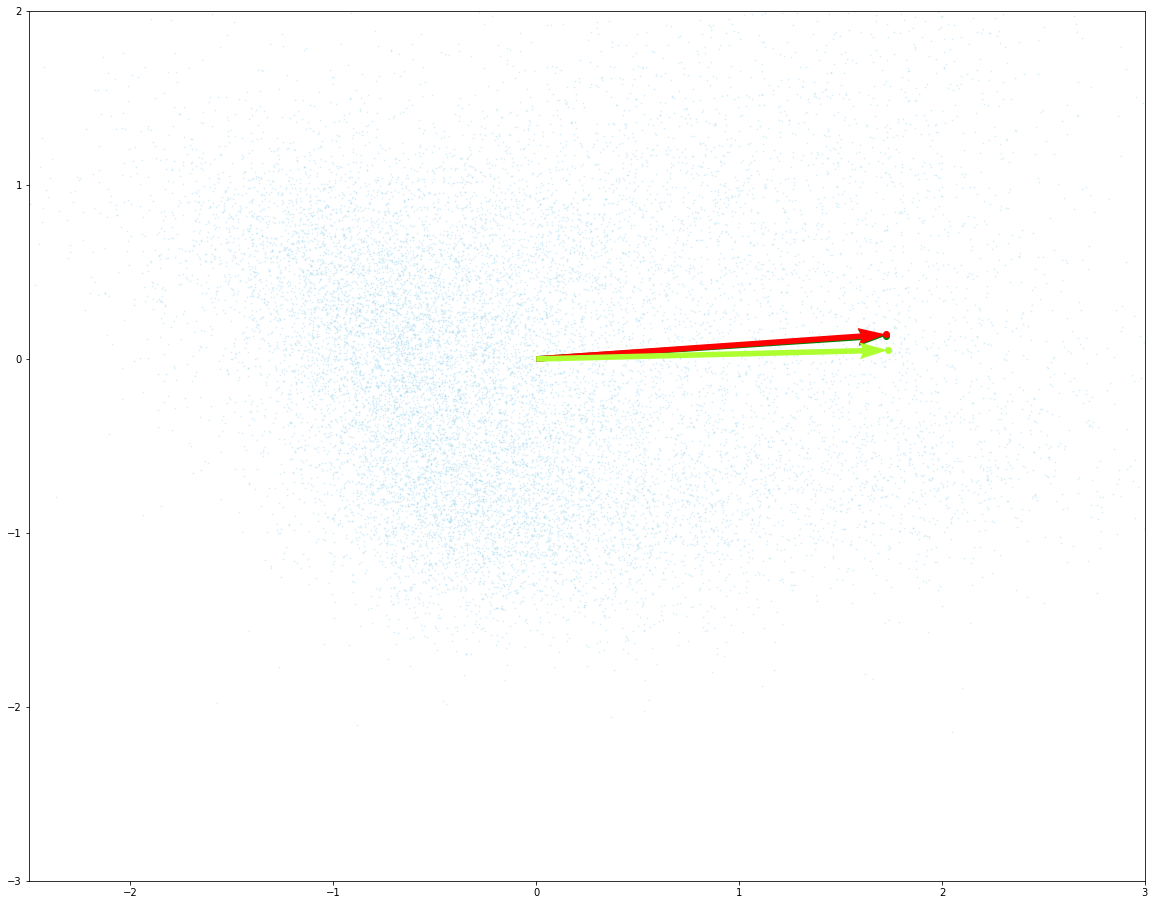

In [227]:
#pca_data = embs_df.values
#kmeans = KMeans(n_clusters=1)
#labels = kmeans.fit_predict(pca_data)
pca = PCA(2)
pca_data = pca.fit_transform(embs_df)
#print('pca data', pca_data.shape)
#u_labels = np.unique(labels)
fig, ax = plt.subplots(figsize=(20,16))
#ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i, alpha=0.05)
ax.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.2,s=1, c='skyblue')
origin = np.array([[0, 0],[0, 0]]) # origin point


#ax.scatter()
#for i in u_labels:
#    ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i)
#ax.scatter()
for i, txt in enumerate(embs_df.T):
    if embs_df.index.values[i] == 'dbscan':
        print('dbscan')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='r')#, label='dbscan',s=55)
        plt.quiver(0,0 , pca_data[i,0], pca_data[i,1], color='r', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('dbscan', (pca_data[i,0], pca_data[i,1]))
    elif embs_df.index.values[i] == 'kmeans':
        print('kmeans')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='g')#,label='kmeans',s=55)
        plt.quiver(0, 0 , pca_data[i,0], pca_data[i,1], color='g', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'clustering':
   #     print('clustering')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='magenta',label='clustering',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='magenta', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('kmeans', (pca_data[i,0], pca_data[i,1]))
    elif embs_df.index.values[i] == 'kmedoids':
         #ax.annotate('kmedoids', (pca_data[i,0], pca_data[i,1])
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='greenyellow')#,label='kmedoids',s=55)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='greenyellow', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'scatterplot':
         #ax.annotate('scatterplot', (pca_data[i,0], pca_data[i,1]))
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='pink',label='scatterplot',s=25)
   # elif embs_df.index.values[i] == 'groupage':
        #ax.annotate('groupage', (pca_data[i,0], pca_data[i,1]))
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='magenta',label='groupage',s=25)
   # elif embs_df.index.values[i] == 'groups':
        #ax.annotate('groupage', (pca_data[i,0], pca_data[i,1]))
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='grey',label='groups',s=25)
    # elif embs_df.index.values[i] == 'bscan':
    #     ax.annotate('bscan', (pca_data[i,0], pca_data[i,1]))
    #elif embs_df.index.values[i] == 'hdbscan':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='y')
    #    ax.annotate('hdbscan', (pca_data[i, 0], pca_data[i, 1]))
    elif embs_df.index.values[i] == 'clusters':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='b',label='clusters',s=25)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='b', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('clusters', (pca_data[i, 0], pca_data[i, 1]))
    elif embs_df.index.values[i] == 'clusterize':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='y')#,label='clusterize',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='y', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'algorithm':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='darkviolet',label='algorithm',s=25)
   # elif embs_df.index.values[i] == 'pearson':
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='dodgerblue')#,label='pearson',s=55)
   #     plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='dodgerblue', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'kendall':
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='darkslategrey')#,label='kendall',s=55)
    #    plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='darkslategrey', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
   # elif embs_df.index.values[i] == 'cramer':
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='salmon')#,label='cramer',s=55)
   #     plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='salmon', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'correlation':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='lightcoral',label='correlation',s=55)
  #  elif embs_df.index.values[i] == 'spearman':
  #      ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='chocolate')#,label='spearman')
  #      print(pca_data[i, 1])
   #     plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='chocolate', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('clusterize', (pca_data[i, 0], pca_data[i, 1]))

#plt.xlim(-2.5,6)
#plt.ylim(-2,3)

plt.xlim(-2.5,3)
plt.ylim(-3,2)
#plt.legend()
#plt.savefig('scatterplot_words_vectors.png')
plt.show()

In [169]:
db = embs_df[embs_df.index=='dbscan']
km = embs_df[embs_df.index=='kmeans']
kmed = embs_df[embs_df.index=='kmedoids']
pears = embs_df[embs_df.index=='pearson']
sp = embs_df[embs_df.index=='spearman']
kend = embs_df[embs_df.index=='kendall']
cram = embs_df[embs_df.index=='cramer']
cos_db_km = 1 - spatial.distance.cosine(db, km)
cos_db_kmed = 1 - spatial.distance.cosine(db, kmed)
cos_kmed_km = 1 - spatial.distance.cosine(kmed, km)
cos_pears_sp = 1 - spatial.distance.cosine(pears, sp)
cos_pears_kend = 1 - spatial.distance.cosine(pears, kend)
cos_pears_cram = 1 - spatial.distance.cosine(pears, cram)
cos_sp_kend = 1 - spatial.distance.cosine(sp, kend)
cos_sp_cram = 1 - spatial.distance.cosine(sp, cram)
cos_kend_cram = 1 - spatial.distance.cosine(kend, cram)

In [178]:
print('dbscan-kmeans', cos_db_km)
print('dbscan-kmedoids', cos_db_kmed)
print('kmeans-kmedoids', cos_kmed_km)
print('pearson-spearman', cos_pears_sp)
print('pearson-kendall', cos_pears_kend)
print('pearson-cramer', cos_pears_cram)
print('spearman-kendall', cos_sp_kend)
print('spearman-cramer', cos_sp_cram)
print('kendall-cramer', cos_kend_cram)

dbscan-kmeans 0.988615048215098
dbscan-kmedoids 0.6948631932163016
kmeans-kmedoids 0.6544781957231001
pearson-spearman 0.27444188052578045
pearson-kendall 0.10677075171955075
pearson-cramer 0.20420758209768575
spearman-kendall 0.047650148913853885
spearman-cramer 0.11148811512173995
kendall-cramer 0.1748457927469479


In [228]:
embs_df= pd.read_csv('embeddings300_df_09pearson.csv', index_col=0)

-0.7609362722219563


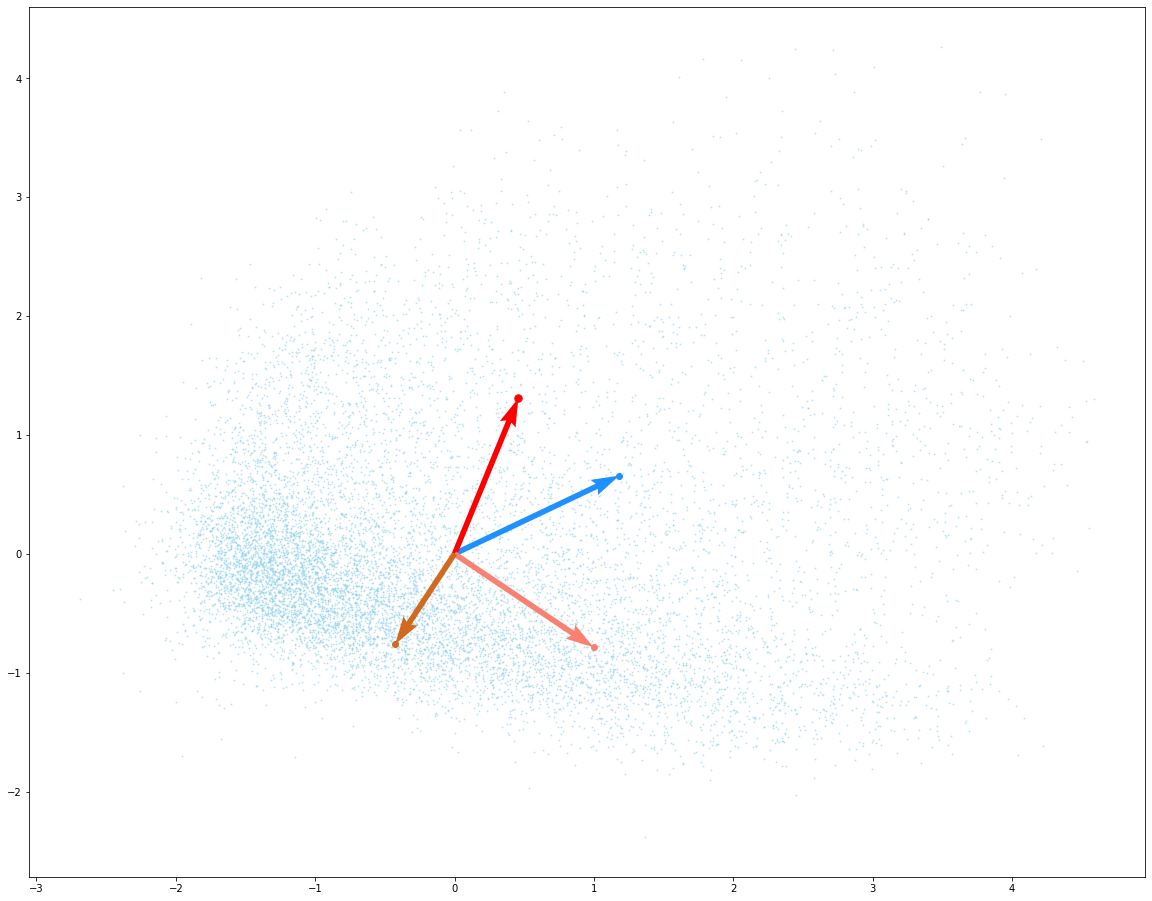

In [230]:
#pca_data = embs_df.values
#kmeans = KMeans(n_clusters=1)
#labels = kmeans.fit_predict(pca_data)
pca = PCA(2)
pca_data = pca.fit_transform(embs_df)
#print('pca data', pca_data.shape)
#u_labels = np.unique(labels)
fig, ax = plt.subplots(figsize=(20,16))
#ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i, alpha=0.05)
ax.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.4,s=1, c='skyblue')
origin = np.array([[0, 0],[0, 0]]) # origin point


#ax.scatter()
#for i in u_labels:
#    ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i)
#ax.scatter()
for i, txt in enumerate(embs_df.T):
    if embs_df.index.values[i] == 'pearson':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='dodgerblue')#,label='pearson',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='dodgerblue', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'kendall':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='darkslategrey')#,label='kendall',s=55)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='darkslategrey', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'cramer':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='salmon')#,label='cramer',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='salmon', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'correlation':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='lightcoral',label='correlation',s=55)
    elif embs_df.index.values[i] == 'spearman':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='chocolate')#,label='spearman')
        print(pca_data[i, 1])
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='chocolate', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('spearman', (pca_data[i, 0], pca_data[i, 1]), fontsize=20)
    elif embs_df.index.values[i] == 'correlation':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='red',label='correlation',s=55)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='red', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        

#plt.xlim(-2.5,6)
#plt.ylim(-2,3)

#plt.xlim(-2.5,3)
#plt.ylim(-3,2)
#plt.legend()
#plt.savefig('scatterplot_words_vectors_pearson.png')
plt.show()

In [264]:
embs_df= pd.read_csv('embeddings300_df.csv', index_col=0)

In [261]:
embs_df[embs_df.index=='kmeans']

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
kmeans,-0.098482,0.282123,0.041604,-0.137992,0.00364,-0.018952,-0.076664,0.062055,-0.191816,0.132657,...,-0.129458,0.270347,-0.0028,0.097406,0.226213,-0.128197,-0.194169,-0.224129,-0.016006,0.082944


kmeans
dbscan
a


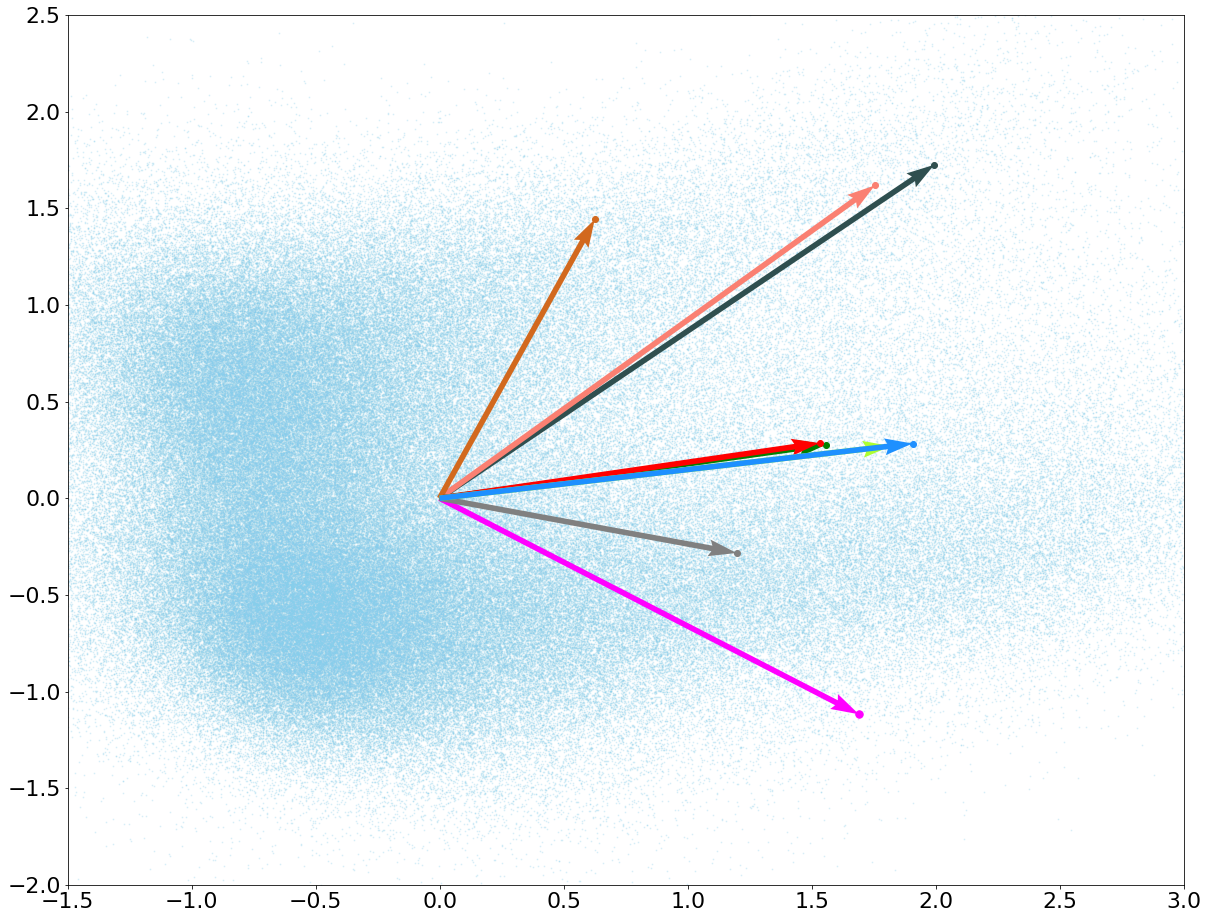

In [270]:
import matplotlib
#pca_data = embs_df.values
#kmeans = KMeans(n_clusters=1)
#labels = kmeans.fit_predict(pca_data)
pca = PCA(2)
pca_data = pca.fit_transform(embs_df)
#print('pca data', pca_data.shape)
#u_labels = np.unique(labels)
fig, ax = plt.subplots(figsize=(20,16))
#ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i, alpha=0.05)
ax.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.2,s=1, c='skyblue')
origin = np.array([[0, 0],[0, 0]]) # origin point
matplotlib.rcParams.update({'font.size': 22})

plt.rcParams.update({'font.size': 22})
#ax.scatter()
#for i in u_labels:
#    ax.scatter(pca_data[labels==i, 0], pca_data[labels==i, 1], label=i)
#ax.scatter()
for i, txt in enumerate(embs_df.T):
    if embs_df.index.values[i] == 'dbscan':
        print('dbscan')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='r')#, label='dbscan',s=55)
        plt.quiver(0,0 , pca_data[i,0], pca_data[i,1], color='r', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('dbscan', (pca_data[i,0], pca_data[i,1]))
    elif embs_df.index.values[i] == 'kmeans':
        print('kmeans')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='g')#,label='kmeans',s=55)
        plt.quiver(0, 0 , pca_data[i,0], pca_data[i,1], color='g', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'clustering':
   #     print('clustering')
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='magenta',label='clustering',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='magenta', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('kmeans', (pca_data[i,0], pca_data[i,1]))
    elif embs_df.index.values[i] == 'kmedoids':
        print('a')
         #ax.annotate('kmedoids', (pca_data[i,0], pca_data[i,1])
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='greenyellow')#,label='kmedoids',s=55)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='greenyellow', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'scatterplot':
         #ax.annotate('scatterplot', (pca_data[i,0], pca_data[i,1]))
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='pink',label='scatterplot',s=25)
    #    plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='pink', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
   # elif embs_df.index.values[i] == 'groupage':
        #ax.annotate('groupage', (pca_data[i,0], pca_data[i,1]))
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='magenta',label='groupage',s=25)
   # elif embs_df.index.values[i] == 'groups':
        #ax.annotate('groupage', (pca_data[i,0], pca_data[i,1]))
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='grey',label='groups',s=25)
    # elif embs_df.index.values[i] == 'bscan':
    #     ax.annotate('bscan', (pca_data[i,0], pca_data[i,1]))
    #elif embs_df.index.values[i] == 'hdbscan':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='y')
    #    ax.annotate('hdbscan', (pca_data[i, 0], pca_data[i, 1]))
   # elif embs_df.index.values[i] == 'clusters':
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='b',label='clusters',s=25)
   #     plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='b', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('clusters', (pca_data[i, 0], pca_data[i, 1]))
   # elif embs_df.index.values[i] == 'clusterize':
   #     ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='y')#,label='clusterize',s=55)
   #     plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='y', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    #elif embs_df.index.values[i] == 'algorithm':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='darkviolet',label='algorithm',s=25)
    elif embs_df.index.values[i] == 'homoscedasticity':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='dodgerblue')#,label='pearson',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='dodgerblue', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'kendall':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='darkslategrey')#,label='kendall',s=55)
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='darkslategrey', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    elif embs_df.index.values[i] == 'cramer':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='salmon')#,label='cramer',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='salmon', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
   # elif embs_df.index.values[i] == 'correlation':
    #    ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='grey',label='correlation',s=55)
    #    plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='grey', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
    
    elif embs_df.index.values[i] == 'spearman':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='chocolate')#,label='spearman')
  #      print(pca_data[i, 1])
        plt.quiver(0, 0, pca_data[i,0], pca_data[i,1], color='chocolate', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
        #ax.annotate('clusterize', (pca_data[i, 0], pca_data[i, 1]), fontsize=20)
    elif embs_df.index.values[i] == 'pca':
        ax.scatter(pca_data[i, 0], pca_data[i, 1], alpha=1, c='grey')#,label='pearson',s=55)
        plt.quiver(0,0, pca_data[i,0], pca_data[i,1], color='grey', angles='xy', scale_units='xy', scale=1,units='width',width=0.005)
   

plt.xlim(-1.5,3)
plt.ylim(-2,2.5)

#plt.xlim(-2.5,3)
#plt.ylim(-3,2)
#plt.legend()
#plt.savefig('scatterplot_words_vectors_300.png')
plt.show()